In [2]:

#importing necessary libraries
import pandas as pd
import numpy as np

In [3]:
data_ = pd.read_csv('./diabetes_prediction_dataset.csv')
data_.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


In [4]:
data_.shape

(100000, 9)

Error handling

In [5]:
data_.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
data_.dropna(inplace=True)

In [7]:
data_.shape

(100000, 9)

feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
data_[['age', 'bmi','HbA1c_level','blood_glucose_level']] = scaler.fit_transform(data_[['age', 'bmi','HbA1c_level','blood_glucose_level']])


In [9]:
data_.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,1.692704,0,1,never,-0.321056,1.001706,0.047704,0
1,Female,0.538006,0,0,No Info,-0.000116,1.001706,-1.426210,0
2,Male,-0.616691,0,0,never,-0.000116,0.161108,0.489878,0


Encode

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Assuming data_ is your DataFrame
x = data_.iloc[:, :-1].values
y = data_.iloc[:, -1].values

print("normal x value\n",x)
# label encoder 
#female = 0 
#male = 1
label_encoder = LabelEncoder()
x[:, 0] = label_encoder.fit_transform(x[:, 0])

print("label encode gender value\n",x)


# Use ColumnTransformer for OneHotEncoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder="passthrough")
x = np.array(ct.fit_transform(x))
print("OneHot Encoding\n",x)
print("y values\n",y)

normal x value
 [['Female' 1.6927035405262736 0 ... -0.3210557916611154
  1.0017057235688864 0.04770421587098508]
 ['Female' 0.5380064272004933 0 ... -0.00011558367772035405
  1.0017057235688864 -1.426209989644696]
 ['Male' -0.616690686125287 0 ... -0.00011558367772035405
  0.16110802156803655 0.4898784775256894]
 ...
 ['Male' 1.0709435564277765 0 ... 0.07672925485351482 0.16110802156803655
  0.4161827672499054]
 ['Female' -0.7943363958677148 0 ... 1.2203612635830785
  -1.4266876377669033 -0.9349052544728024]
 ['Female' 0.6712407095073141 0 ... -0.7369219766536841
  1.0017057235688864 -1.1805576220587493]]
label encode gender value
 [[0 1.6927035405262736 0 ... -0.3210557916611154 1.0017057235688864
  0.04770421587098508]
 [0 0.5380064272004933 0 ... -0.00011558367772035405 1.0017057235688864
  -1.426209989644696]
 [1 -0.616690686125287 0 ... -0.00011558367772035405 0.16110802156803655
  0.4898784775256894]
 ...
 [1 1.0709435564277765 0 ... 0.07672925485351482 0.16110802156803655
  0.4

Split dataset

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)


print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[0.0 0.0 0.0 ... 0.3208246243056747 0.44130725556831985
  -1.1805576220587493]
 [1.0 0.0 0.0 ... -0.21708924541297367 -1.893686361100709
  -1.1805576220587493]
 [0.0 0.0 1.0 ... 1.035029594184216 0.9083059789021257
  -0.19794815171496177]
 ...
 [0.0 0.0 0.0 ... 0.15658761646440678 0.2545077662347974
  -1.1805576220587493]
 [0.0 0.0 0.0 ... 4.548797505063454 0.6281067449018424
  -0.29620909874934054]
 [0.0 0.0 0.0 ... -0.00011558367772035405 0.44130725556831985
  -1.1805576220587493]]
[[1.0 0.0 0.0 ... -0.1055888914656905 -0.49269019109929174
  0.4161827672499054]
 [0.0 0.0 0.0 ... -0.00011558367772035405 -0.9596889144330976
  -0.19794815171496177]
 [1.0 0.0 0.0 ... -0.00011558367772035405 0.6281067449018424
  -0.19794815171496177]
 ...
 [0.0 0.0 0.0 ... -0.26681237622730225 0.2545077662347974
  -0.9349052544728024]
 [1.0 0.0 0.0 ... 2.067161248966497 0.5347070002350807 0.4898784775256894]
 [0.0 0.0 0.0 ... 2.6683591033579273 -0.9596889144330976
  0.4898784775256894]]
[0 0 0 ... 0 0 0]

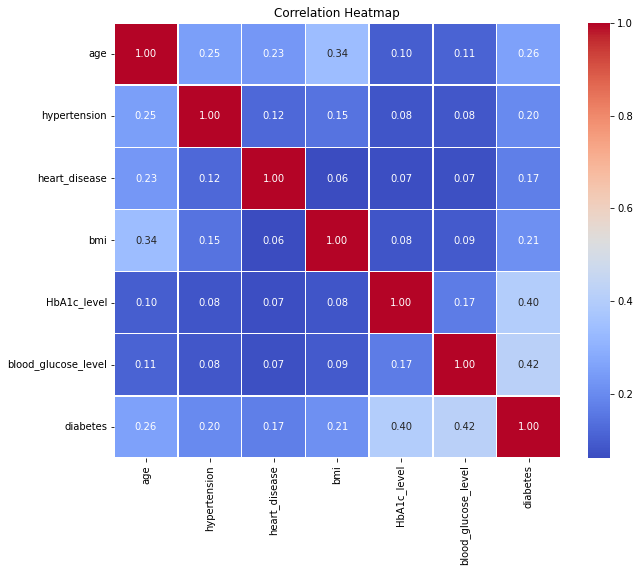

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset with features and target variable
# Replace this with the actual path or data loading code

# Calculate the correlation matrix
correlation_matrix = data_.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


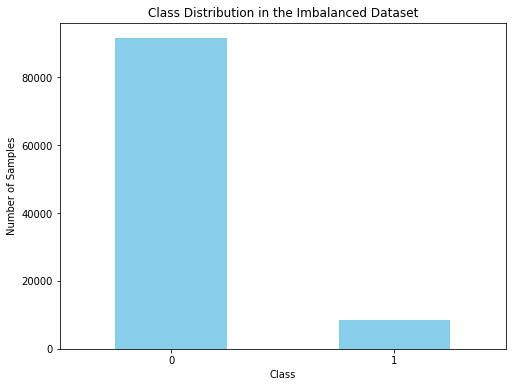

In [19]:
import matplotlib.pyplot as plt

# Class distribution bar chart for the target variable 'y'
class_counts = pd.Series(y).value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in the Imbalanced Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()


Train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=8) #as there are 8 parameter for predict diabetes
knn_model.fit(x_train, y_train)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

knn_predictions = knn_model.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))


logistic_predictions = logistic_model.predict(x_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))


svm_predictions = svm_model.predict(x_test)
print("\nSVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

nb_predictions = nb_model.predict(x_test)
print("\nNaive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))